# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

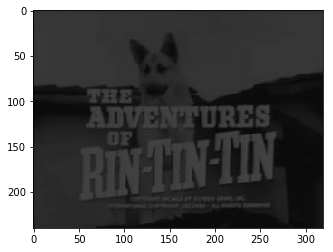

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

In [8]:
rintin_gray


array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

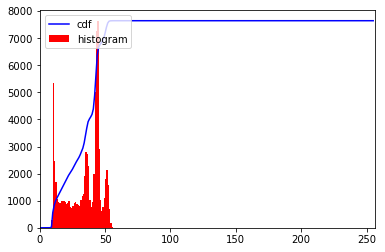

In [9]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

### O histograma não aproveita bem as faixas de cores, pois só usa aproximadamente 20% do total de cores da faixa.

In [10]:
def transformadora(pixel):
    return ((pixel-8)/58)*255

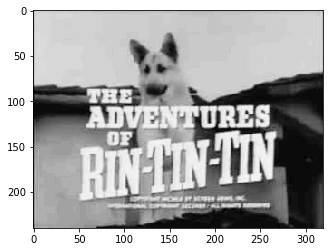

In [11]:
matriz=[]

for i in rintin_gray:
    lista=[]
    for j in i:
        pixel=transformadora(j)
        lista.append(pixel)
    matriz.append(lista)
    lista=[]
    
plt.imshow(matriz, cmap="Greys_r")

In [12]:
myarray = np.asarray(matriz)


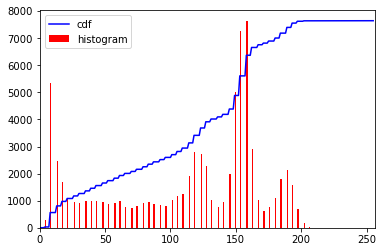

In [13]:

hist,bins = np.histogram(myarray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(myarray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [14]:
hall=cv2.imread("hall_box_battery1.jpg")

In [15]:
hall_rgb = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)

In [16]:
hall_red = hall_rgb[:,:,0]
hall_blue=hall_rgb[:,:,2]


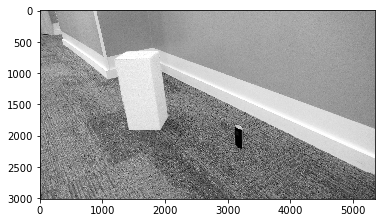

In [17]:
plt.imshow(hall_red, cmap='Greys_r')

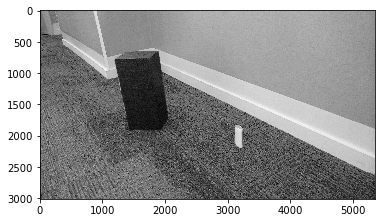

In [18]:
plt.imshow(hall_blue, cmap='Greys_r')

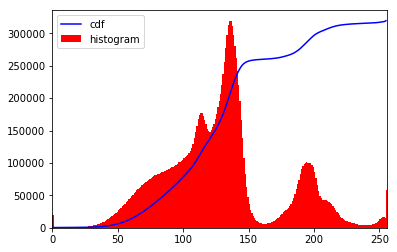

In [19]:

hist,bins = np.histogram(hall_red.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_red.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

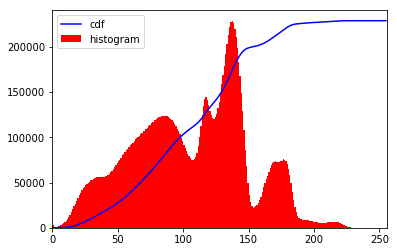

In [20]:

hist,bins = np.histogram(hall_blue.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_blue.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Sim, é possível, pois vemos na primeira imagem a caixa vermelha com a cor branca, mostrando que o vermelho nessa imagem é muito intenso, indicando também a ausência de vermelho na caixa azul. O histograma aponta a presença dos tons de vermelho.

### Na segunda imagem, acontece o contrário. A caixa vermelha fica quase preta, indicando a ausência de azul na caixa vermelha e a caixa azul está branca, indicando a presença de azul. O histograma aponta a presença dos tons de azul.

In [21]:
lower_range = np.array([0,110,0], dtype=np.uint8)
upper_range = np.array([10,255,255], dtype=np.uint8)

In [24]:
hsv = cv2.cvtColor(hall_rgb, cv2.COLOR_RGB2HSV)

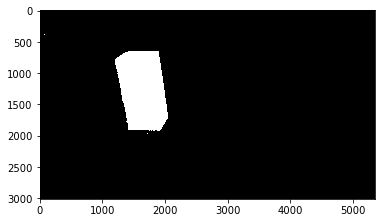

In [25]:
mask = cv2.inRange(rgb_hsv, lower_range, upper_range)
plt.imshow(mask, cmap="Greys_r")